## ÎÖ∏Îìú 12 - Îî•Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏

--------------------------------------------------------------------------------

### **<Boston Ï£ºÌÉù Í∞ÄÍ≤© ÏòàÏ∏° Î™®Îç∏>**

#### 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
- Î®ºÏ†Ä, Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏôÄÏÑú ÌôïÏù∏ÌïòÍ≥† Ï†ÑÏ≤òÎ¶¨Î•º ÏßÑÌñâÌïúÎã§.
- Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ keras.datasetsÏóêÏÑú Î∂àÎü¨Ïò¨ Ïàò ÏûàÎäî boston_housing Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌôúÏö©ÌïúÎã§. 

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
# keras.datasets ÏïàÏóê boston_housing Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìúÌï©ÎãàÎã§.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¨Í∏∞Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
print(len(train_data))
print(len(test_data))

404
102


- Ïù¥Ï†ú, Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ ÌëúÏ§ÄÌôî ÏûëÏóÖÏùÑ ÏßÑÌñâÌïúÎã§.

In [4]:
# Î¨∏Ï†ú 1-1: Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ ÌëúÏ§ÄÌôî ÏûëÏóÖÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
# Î®ºÏ†Ä ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò Í∞Å ÌäπÏÑ±Ïùò ÌèâÍ∑†ÏùÑ Î∫çÎãàÎã§.
mean = train_data.mean(axis=0)
train_data -= mean

# ÌèâÍ∑†ÏùÑ Î∫Ä ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌëúÏ§ÄÌé∏Ï∞®Î•º ÎÇòÎàïÎãàÎã§.
# Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ±Ïùò Ï§ëÏïôÏù¥ 0Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Í≥†, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 1Ïù¥ ÎêòÍ≤å ÎßåÎì≠ÎãàÎã§.
std = train_data.std(axis=0)
train_data /= std

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÌèâÍ∑†ÏùÑ ÎπºÍ≥†, ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÎÇòÎàïÎãàÎã§.
test_data -= mean
test_data /= std

#### 2) Î™®Îç∏ Íµ¨ÏÑ± Î∞è Ïª¥ÌååÏùº
- Í∑∏ Îã§Ïùå, Ï£ºÌÉù Í∞ÄÍ≤© ÏòàÏ∏°ÏùÑ ÏúÑÌïú Îî•Îü¨Îãù Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïòÍ≥† Ïª¥ÌååÏùºÌïúÎã§.
- Sequential() Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Sequential API Î∞©Î≤ïÏúºÎ°ú Îî•Îü¨Îãù Î™®Îç∏ÏùÑ Íµ¨ÏÑ±Ìï¥Î≥∏Îã§. 

In [5]:
# Î¨∏Ï†ú 1-2: Ï£ºÌÉù Í∞ÄÍ≤© ÏòàÏ∏°ÏùÑ ÏúÑÌïú Îî•Îü¨Îãù Î™®Îç∏ Íµ¨ÏÑ± Î∞è Ïª¥ÌååÏùºÌï©ÎãàÎã§.
# input_shapeÏùÄ (train_data.shape[1], )ÏúºÎ°ú Íµ¨ÏÑ±Ìï©ÎãàÎã§.
# ÌöåÍ∑Ä(ÏòàÏ∏°)ÏùÑ ÏúÑÌïú Î™®Îç∏Ïù¥ÎØÄÎ°ú lossÎ•º mse, metricsÎ•º maeÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Ï∂úÎ†•Ï∏µÏùÄ Ïú†Îãõ Ïàò 1, ÌôúÏÑ±Ìôî Ìï®Ïàò ÏóÜÏùå (ÌöåÍ∑Ä)

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

c:\Users\lynn9\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 3) Î™®Îç∏ ÌïôÏäµ
- epochs -> 100
- batch_size -> 16 ÏúºÎ°ú ÏûÑÏùòÎ°ú ÏÑ§Ï†ïÌñàÎã§.

In [6]:
# Î¨∏Ï†ú 1-3: ÏòàÏ∏°ÏùÑ ÏúÑÌïú Îî•Îü¨Îãù Î™®Îç∏ÏùÑ ÌïôÏäµÌï©ÎãàÎã§.
# epochsÏôÄ batch sizeÎäî ÏûêÏú†Î°≠Í≤å ÏÑ§Ï†ïÌï¥ Î≥¥ÏÑ∏Ïöî. Î™®Îç∏ ÌïôÏäµ ÌõÑÏóêÎäî Î™®Îç∏ ÌïôÏäµ Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï¥ Î≥¥ÏÑ∏Ïöî.

history = model.fit(
    train_data,
    train_labels,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 22ms/step - loss: 570.0101 - mae: 21.9420 - val_loss: 553.5905 - val_mae: 21.7733
Epoch 2/100
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 453.5004 - mae: 19.4098 - val_loss: 427.1080 - val_mae: 18.8224
Epoch 3/100
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 341.0602 - mae: 16.2669 - val_loss: 279.2711 - val_mae: 14.7408
Epoch 4/100
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 183.9090 - mae: 11.5210 - val_loss: 150.4289 - val_mae: 9.9230
Epoch 5/100
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 104.7602 - mae: 8.3323 - val_loss: 77.5580 - val_mae: 6.7728
Epoch 6/100
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step - loss: 53.2422 - mae: 5.8137 - val_loss: 49.4399 - val_mae: 5.4579
Epoch 7/100
21/21 ‚îÅ‚îÅ‚îÅ‚î

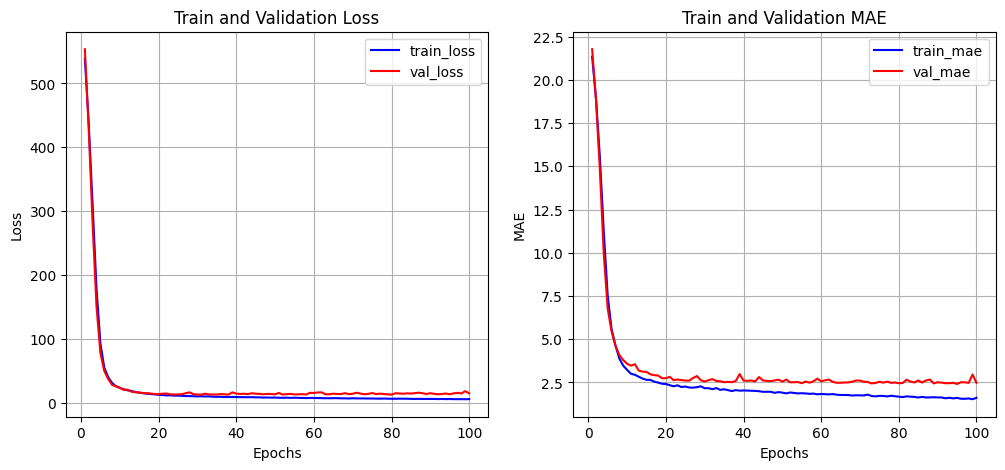

In [7]:
# Î™®Îç∏ ÌïôÏäµ ÌûàÏä§ÌÜ†Î¶¨ÏóêÏÑú loss, val_loss, mae, val_maeÎ•º Ï∞®Ìä∏Î°ú Î≥¥Ïó¨Ï§çÎãàÎã§.
# plt.style.use('seaborn-whitegrid')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

#### 4) Î™®Îç∏ ÌèâÍ∞Ä Î∞è ÏòàÏ∏°
- test Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏ÏôÄÏÑú, Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïúÎã§.

In [8]:
# Î¨∏Ï†ú 1-4: ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels, verbose=1)

print(f"Test MSE: {test_mse_score:.4f}")
print(f"Test MAE: {test_mae_score:.4f}")

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 17.7343 - mae: 2.7159 
Test MSE: 22.3154
Test MAE: 2.8757


<Í≤∞Í≥º>
- MAE (ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®): ÏïΩ 2.6 ~ 2.8
- MAE Í∞íÏù¥ ÏïΩ 2.8 Ïù¥Î©¥, ÏòàÏ∏° Ïò§Ï∞®Í∞Ä ÏïΩ 2800Îã¨Îü¨ÎùºÎäî ÏùòÎØ∏ÎùºÍ≥† ÌïúÎã§.
- Ïù¥ Ï†ïÎèÑ Ïò§Ï∞®Îäî, Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î≥¥ÌÜµ or Í∑∏ÎÇòÎßà ÏñëÌò∏ÌïòÎã§Í≥† ÌåêÎã®Ìï† Ïàò ÏûàÎã§.
- Í∑∏ÏπòÎßå ÏÑ±Îä• Í∞úÏÑ†ÏùÑ Ìï¥Î≥¥ÎäîÍ≤ÉÏù¥ Ï¢ãÎã§.

--------------------------------------------------------------------------------

### **<Reuters Îî•Îü¨Îãù Î™®Îç∏>**

#### 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
- reuters Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨Ïò§Í≥†, train(ÌïôÏäµ) Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú 25%Î•º validation(Í≤ÄÏ¶ù) Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î∂ÑÎ¶¨ÌïúÎã§.
- Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ keras.datasetsÏóêÏÑú Î∂àÎü¨Ïò¨ Ïàò ÏûàÎäî reuters Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌôúÏö©ÌïòÍ≥†, Ïù¥Îïå ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ïÏùÑ ÌÜµÌï¥ÏÑú Îã®Ïñ¥Ïùò Í∞úÏàòÎäî 10000Í∞úÎ°ú Ï†úÌïúÌïúÎã§ (num_words=10000).
- Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ ÏûëÏóÖÏóêÏÑúÎäî sklearn ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò train_test_split Ìï®ÏàòÎ•º ÌôúÏö©ÌïúÎã§.
- train/validation/test Îç∞Ïù¥ÌÑ∞ÏôÄ Î†àÏù¥Î∏î Ï¢ÖÎ•òÍ∞Ä Î™á Í∞úÏù∏ÏßÄ Ï∂úÎ†•Ìï¥Î≥∏Îã§.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# Î¨∏Ï†ú 2-1: reuters Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìúÌïòÍ≥†, ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú 25%Î•º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º 25% ÎπÑÏú®Î°ú Î∂ÑÎ¶¨
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42
)

# ÌõàÎ†®, Í≤ÄÏ¶ù, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Î†àÏù¥Î∏î Ï¢ÖÎ•òÍ∞Ä Î™á Í∞úÏù∏ÏßÄ Ï∂úÎ†•Ìï©ÎãàÎã§.
print(len(train_data))       # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïàò
print(len(val_data))         # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ïàò
print(len(test_data))        # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ïàò
print(len(set(train_labels)))  # Î†àÏù¥Î∏îÏùò Í∞úÏàò (ÌÅ¥ÎûòÏä§ Ïàò)

6736
2246
2246
46


- Í∑∏ Îã§Ïùå, ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ÏÑú Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÎßàÎã§ 'Ïõê-Ìï´ Ïù∏ÏΩîÎî©'ÏùÑ ÏàòÌñâÌïúÎã§.
- Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞Îì§ÏùÄ Î≤îÏ£ºÌòï(categorical) ÌòïÌÉúÎ°ú, to_categorical() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î≥ÄÌôòÌïúÎã§.

In [11]:
# Î¨∏Ï†ú 2-2: ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ÏÑú Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÎßàÎã§ Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0  # Îã®Ïñ¥ Ïù∏Îç±Ïä§ ÏúÑÏπòÏóê 1 Ìï†Îãπ
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞Îì§ÏùÄ Î≤îÏ£ºÌòï ÌòïÌÉúÎ°ú to_categorical() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Î≥ÄÌôòÌï©ÎãàÎã§.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

#### 2) Î™®Îç∏ Íµ¨ÏÑ± Î∞è Ïª¥ÌååÏùº
- BatchNormalizationÍ≥º DropoutÏùÑ Ï†ÅÏö©ÌïòÏó¨ Îπ†Î•¥Í≤å ÌïôÏäµÌïòÎ©¥ÏÑú Í≥ºÎåÄÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÍ≥†, 46Í∞úÏùò Îâ¥Ïä§ Ï£ºÏ†úÎ•º Î∂ÑÎ•òÌïòÎäî Îî•Îü¨Îãù Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïúÎã§.

In [12]:
# Î¨∏Ï†ú 2-3: Îπ†Î•∏ ÌïôÏäµÍ≥º Í≥ºÎåÄÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ BatchNormalizationÍ≥º DropoutÏùÑ Ï†ÅÏö©Ìïú Îî•Îü¨Îãù Î™®Îç∏ÏùÑ Íµ¨ÏÑ±Ìï©ÎãàÎã§.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())      # Î∞∞Ïπò Ï†ïÍ∑úÌôî
model.add(layers.Dropout(0.5))              # ÎìúÎ°≠ÏïÑÏõÉÏúºÎ°ú Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(46, activation='softmax'))  # 46Í∞ú Îâ¥Ïä§ Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•òÏö© Ï∂úÎ†•Ï∏µ

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\lynn9\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 128)            ‚îÇ     1,280,128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ (None, 128)            ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 64)             ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 46)             ‚îÇ         2,990 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 1,292,142 (4.93 MB)

 Trainable params: 1,291,758 (4.93 MB)

 Non-trainable params: 384 (1.50 KB)

#### 3) Î™®Îç∏ ÌïôÏäµ
- ModelCheckpointÏôÄ EarlyStopping ÏΩúÎ∞± Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨, Î™®Îç∏ ÌïôÏäµÏùÑ ÏßÑÌñâÌïúÎã§.

In [14]:
# Î¨∏Ï†ú 2-4: ModelCheckpointÏôÄ EarlyStopping ÏΩúÎ∞± Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨ Î™®Îç∏ ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.
checkpoint_cb = callbacks.ModelCheckpoint(
    'best_reuters_model.keras',  # Ï†ÄÏû•Ìï† Î™®Îç∏ ÌååÏùº Ïù¥Î¶Ñ
    monitor='val_loss',       # Í≤ÄÏ¶ù ÏÜêÏã§ Í∏∞Ï§Ä
    save_best_only=True,      # Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Î™®Îç∏Îßå Ï†ÄÏû•
    verbose=1
)

earlystop_cb = callbacks.EarlyStopping(
    monitor='val_loss',       # Í≤ÄÏ¶ù ÏÜêÏã§ Í∏∞Ï§Ä
    patience=5,               # 5Î≤à Ïó∞ÏÜç Ìñ•ÏÉÅÎêòÏßÄ ÏïäÏúºÎ©¥ Ï¢ÖÎ£å
    restore_best_weights=True  # Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ Í∞ÄÏ§ëÏπò Î≥µÏõê
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

Epoch 1/50
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 133ms/step - accuracy: 0.1658 - loss: 3.9408
Epoch 1: val_loss improved from inf to 3.50364, saving model to best_reuters_model.keras
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 338ms/step - accuracy: 0.1728 - loss: 3.9078 - val_accuracy: 0.5187 - val_loss: 3.5036
Epoch 2/50
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 122ms/step - accuracy: 0.5086 - loss: 2.3050
Epoch 2: val_loss improved from 3.50364 to 3.13956, saving model to best_reuters_model.keras
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 185ms/step - accuracy: 0.5107 - loss: 2.2960 - val_accuracy: 0.6420 - val_loss: 3.1396
Epoch 3/50
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 139ms/step - accuracy: 0.6398 - loss: 1.7214
Epoch 3: val_loss improved from 3.13956 to 2.81665, saving model to best_reuters_model.keras
14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

- Îã§ÏùåÏúºÎ°ú, ÌïôÏäµ ÌûàÏä§ÌÜ†Î¶¨Ïùò loss, val_loss, accuracy, val_accuracyÎ•º Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôîÌïúÎã§.

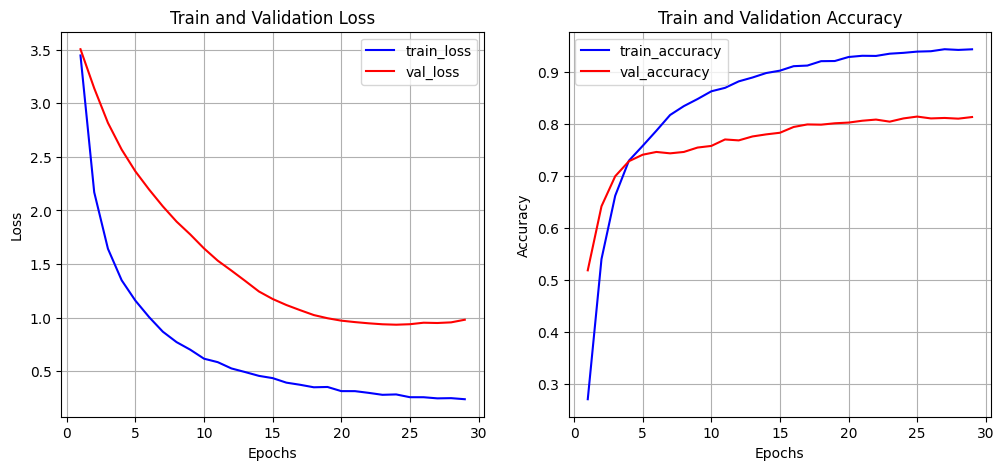

In [15]:
# ÌïôÏäµ ÌûàÏä§ÌÜ†Î¶¨Ïùò `loss`, `val_loss`, `accuracy`, `val_accuracy`Î•º Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

#### 5) Î™®Îç∏ ÌèâÍ∞Ä Î∞è ÏòàÏ∏°
- ÎßàÏßÄÎßâÏúºÎ°ú, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïúÎã§.

In [16]:
# Î¨∏Ï†ú 2-5: ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - accuracy: 0.7935 - loss: 0.9993
Test Loss: 1.0105
Test Accuracy: 0.7863


<Í≤∞Í≥º>
- Ï†ïÌôïÎèÑ(Accuracy): ÏïΩ 78.6%
- loss: ÏïΩ 1.0 -> categorical_crossentropy ÏÜêÏã§Ìï®ÏàòÎäî Î°úÍ∑∏ ÌôïÎ•† Í∏∞Î∞òÏù¥ÎØÄÎ°ú, Í∞íÏù¥ 1.0 Ï†ïÎèÑÎ©¥ ÏïàÏ†ïÏ†ÅÏù∏ Ìé∏Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÎã§.
- Í∑∏ÏπòÎßå ÏÑ±Îä• Í∞úÏÑ†ÏùÑ Ìï¥Î≥¥ÎäîÍ≤ÉÏù¥ Ï¢ãÎã§.

--------------------------------------------------------------------------------

### **<CIFAR10 Îî•Îü¨Îãù Î™®Îç∏>**

#### 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
- Ïö∞ÏÑ†, CIFAR10 Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìúÌïòÍ≥†, train(ÌïôÏäµ) Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú 20%Î•º validation(Í≤ÄÏ¶ù) Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î∂ÑÎ¶¨ÌïúÎã§.
- Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ keras.datasetsÏóêÏÑú Î∂àÎü¨Ïò¨ Ïàò ÏûàÎäî CIFAR10 Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌôúÏö©ÌïúÎã§.
    - üßê CIFAR10 Îç∞Ïù¥ÌÑ∞ÏÖã: 32*32 ÌîΩÏÖÄÏùò 6000Í∞úÏùò Ïª¨Îü¨ Ïù¥ÎØ∏ÏßÄÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÎã§. Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í∞Å Ïù¥ÎØ∏ÏßÄÎäî 10Í∞úÏùò ÌÅ¥ÎûòÏä§Î°ú ÎùºÎ≤®ÎßÅÎêòÏñ¥ ÏûàÏúºÎ©∞, Î®∏Ïã†Îü¨Îãù Ïó∞Íµ¨Ïóê Í∞ÄÏû• ÎÑêÎ¶¨ ÏÇ¨Ïö©ÎêòÍ≥† ÏûàÎã§.
- Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ ÏûëÏóÖÏóêÏÑúÎäî sklearn ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò train_test_split Ìï®ÏàòÎ•º ÌôúÏö©ÌïúÎã§.
- train/validation/test Îç∞Ïù¥ÌÑ∞ÏôÄ Î†àÏù¥Î∏î Ï¢ÖÎ•òÍ∞Ä Î™á Í∞úÏù∏ÏßÄ Ï∂úÎ†•Ìï¥Î≥∏Îã§.

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [18]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Î¨∏Ï†ú 3-1: cifar10 Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìúÌïòÍ≥†, ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú 20%Î•º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# ÌîΩÏÖÄ Í∞í Ï†ïÍ∑úÌôî (0~255 ‚Üí 0~1 Î≤îÏúÑ)
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï§ë 20%Î•º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú Î∂ÑÎ¶¨
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

# ÌõàÎ†®, Í≤ÄÏ¶ù, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Î†àÏù¥Î∏î Ï¢ÖÎ•òÍ∞Ä Î™áÍ∞úÏù∏ÏßÄ Ï∂úÎ†•Ìï©ÎãàÎã§.
print("Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞: {} Î†àÏù¥Î∏î: {}".format(x_train_full.shape, y_train_full.shape))
print("ÌïôÏäµ Îç∞Ïù¥ÌÑ∞: {} Î†àÏù¥Î∏î: {}".format(x_train.shape, y_train.shape))
print("Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: {} Î†àÏù¥Î∏î: {}".format(x_val.shape, y_val.shape))
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {} Î†àÏù¥Î∏î: {}".format(x_test.shape, y_test.shape))

Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞: (50000, 32, 32, 3) Î†àÏù¥Î∏î: (50000, 1)
ÌïôÏäµ Îç∞Ïù¥ÌÑ∞: (40000, 32, 32, 3) Î†àÏù¥Î∏î: (40000, 1)
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: (10000, 32, 32, 3) Î†àÏù¥Î∏î: (10000, 1)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: (10000, 32, 32, 3) Î†àÏù¥Î∏î: (10000, 1)


- Ïù¥Ï†ú, class_name Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ÏÑú cifar10Ïùò Î∂ÑÎ•òÏóê Ìï¥ÎãπÌïòÎäî  'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'ÏùÑ Îã¥ÎäîÎã§.

In [19]:
# cifar10Ïùò Î∂ÑÎ•òÏóê Ìï¥ÎãπÌïòÎäî 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'Î•º class_nameÏúºÎ°ú Ï†ïÏùòÌï©ÎãàÎã§.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- Í∑∏ Îã§Ïùå, Îç∞Ïù¥ÌÑ∞ Ï§ë ÏÉòÌîå ÌïòÎÇòÎ•º ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Í≥†, Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉúÎ•º ÌôïÏù∏Ìï¥Î≥∏Îã§. 

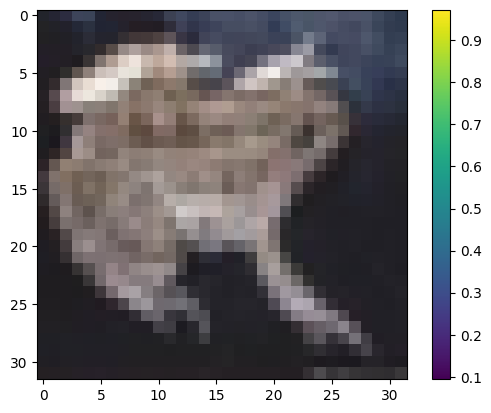

In [20]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò 0Î≤àÏß∏Ïù∏ x_train[0]Î•º Ïù¥ÎØ∏ÏßÄÎ°ú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [21]:
# ÌõàÎ†®, Í≤ÄÏ¶ù, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú(shape)ÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- Í∑∏ Îã§Ïùå, Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉúÎ•º Î≥ÄÌòïÌï¥ÏÑú Î™®Îç∏Ïù¥ Ïûò ÌïôÏäµÌï† Ïàò ÏûàÍ≤åÎÅî ÎßåÎì†Îã§.

In [22]:
# Î¨∏Ï†ú 3-2: ÌõàÎ†®, Í≤ÄÏ¶ù, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú(shape)ÏùÑ 32 * 32 * 3 = 3072Î°ú Î≥ÄÌòïÌï©ÎãàÎã§.
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [23]:
# ÌõàÎ†®, Í≤ÄÏ¶ù, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º 255Î°ú ÎÇòÎàÑÏñ¥ 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

#### 2) Î™®Îç∏ Íµ¨ÏÑ± Î∞è Ïª¥ÌååÏùº
- BatchNormalizationÍ≥º DropoutÏùÑ Ï†ÅÏö©ÌïòÏó¨ Îπ†Î•¥Í≤å ÌïôÏäµÌïòÎ©¥ÏÑú Í≥ºÎåÄÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÍ≥†, 10Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º Î∂ÑÎ•òÌïòÎäî Îî•Îü¨Îãù Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïúÎã§.

In [24]:
# Î¨∏Ï†ú 3-3: BatchNormalizationÍ≥º DropoutÏùÑ Ï†ÅÏö©ÌïòÏó¨ Îπ†Î•∏ ÌïôÏäµÍ≥º Í≥ºÎåÄÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÍ≥†,
# 10Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º Î∂ÑÎ•òÌïòÎäî Îî•Îü¨Îãù Î™®Îç∏ÏùÑ Íµ¨ÏÑ±Ìï©ÎãàÎã§.

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10ÏùÄ ÌÅ¥ÎûòÏä§Í∞Ä 10Í∞ú

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Î†àÏù¥Î∏îÏù¥ Ï†ïÏàò ÌòïÌÉúÏùº Í≤ΩÏö∞ ÏÇ¨Ïö©
    metrics=['accuracy']
)

In [25]:
model.summary()

Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 512)            ‚îÇ     1,573,376 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2           ‚îÇ (None, 512)            ‚îÇ         2,048 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 512)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                 ‚îÇ (None, 256)            ‚îÇ       131,328 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_3           ‚îÇ (None, 256)            ‚îÇ         1,024 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_8 (Dense)                 ‚îÇ (None, 10)             ‚îÇ         2,570 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 1,710,346 (6.52 MB)

 Trainable params: 1,708,810 (6.52 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [26]:
utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


#### 3) Î™®Îç∏ ÌïôÏäµ
- ModelCheckpointÏôÄ EarlyStopping ÏΩúÎ∞± Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨ Î™®Îç∏ ÌïôÏäµÏùÑ ÏßÑÌñâÌïúÎã§.

In [27]:
# Î¨∏Ï†ú 3-4: ModelCheckpointÏôÄ EarlyStopping ÏΩúÎ∞± Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨ Î™®Îç∏ ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.
from tensorflow.keras import callbacks

checkpoint_cb = callbacks.ModelCheckpoint(
    'best_cifar10_model.keras',   # .keras ÌôïÏû•Ïûê ÌïÑÏàò
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

earlystop_cb = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

Epoch 1/50
313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 93ms/step - accuracy: 0.2405 - loss: 2.4432
Epoch 1: val_loss improved from inf to 2.26750, saving model to best_cifar10_model.keras
313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 100ms/step - accuracy: 0.2407 - loss: 2.4425 - val_accuracy: 0.1196 - val_loss: 2.2675
Epoch 2/50
313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 74ms/step - accuracy: 0.3341 - loss: 1.8835
Epoch 2: val_loss improved from 2.26750 to 1.81092, saving model to best_cifar10_model.keras
313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 79ms/step - accuracy: 0.3342 - loss: 1.8834 - val_accuracy: 0.3930 - val_loss: 1.8109
Epoch 3/50
313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 72ms/step - accuracy: 0.3702 - loss: 1.7585
Epoch 3: val_loss improved from 1.81092 to 1.67870, saving model to best_cifar10_model.keras
313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

- Í∑∏ Îã§Ïùå, ÌïôÏäµ ÌûàÏä§ÌÜ†Î¶¨Ïùò loss, val_loss, accuracy, val_accuracyÎ•º Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôîÌïúÎã§.

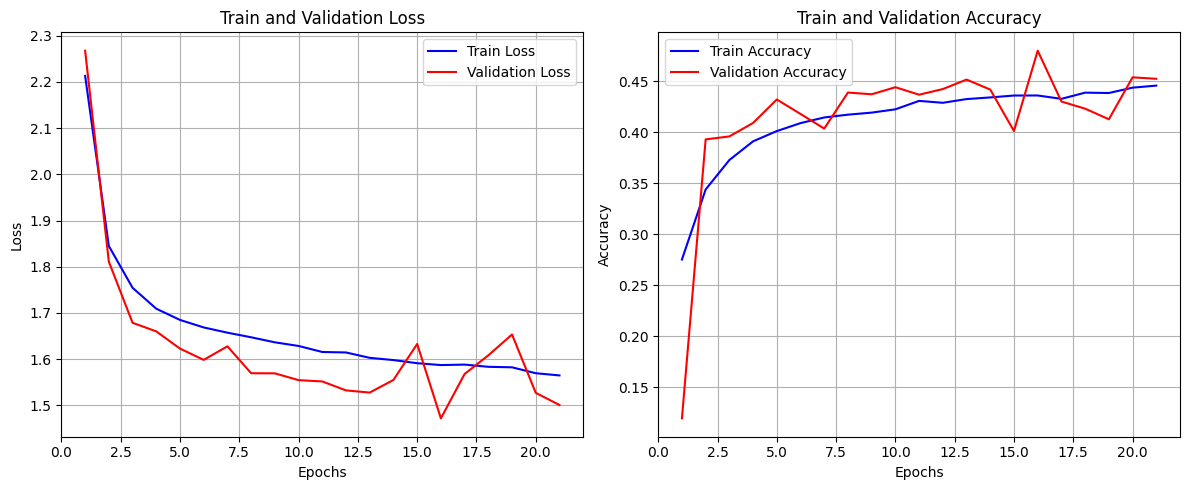

In [28]:
# Î¨∏Ï†ú 3-5: ÌïôÏäµ ÌûàÏä§ÌÜ†Î¶¨Ïùò loss, val_loss, accuracy, val_accuracyÎ•º Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

# ÏÜêÏã§(Loss) ÏãúÍ∞ÅÌôî
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='Train Loss')
ax1.plot(epochs, val_loss, 'r-', label='Validation Loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

# Ï†ïÌôïÎèÑ(Accuracy) ÏãúÍ∞ÅÌôî
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='Train Accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()

#### 4) Î™®Îç∏ ÌèâÍ∞Ä Î∞è ÏòàÏ∏°
- ÎßàÏßÄÎßâÏúºÎ°ú, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïúÎã§.

In [29]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 16ms/step - accuracy: 0.4868 - loss: 1.4579
Test Loss: 1.4620
Test Accuracy: 0.4847


<Í≤∞Í≥º>
- Ï†ïÌôïÎèÑ(Accuracy): ÏïΩ 48.5%
- Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎßéÏù¥ ÎÇÆÏùÄ Ï†ïÌôïÎèÑÏù¥ÎØÄÎ°ú, Î™®Îç∏ Í∞úÏÑ†ÎøêÎßå ÏïÑÎãàÎùº Îã§Î•∏ Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÎäî Î∞©Î≤ïÍπåÏßÄÎèÑ Í≥†Î†§Ìï¥ Î≥º Ïàò ÏûàÎã§.
- cf) ÏÇ¨Ïã§ ÏßÄÍ∏àÍπåÏßÄ Î∞∞Ïö¥ Dense layerÎßå ÌôúÏö©Ìï¥ÏÑúÎäî Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ•º ÏñªÍ∏∞Îäî ÌûòÎì§Îã§Í≥† ÌïúÎã§. Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º Îã§Î£®Í∏∞ ÏúÑÌï¥ÏÑúÎäî Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÌï©Ìïú CNN(Convolution Neural Network) Í≥ÑÏó¥Ïùò Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº ÌïúÎã§..!